In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import access_spectrum as acs
from run_empca import *
silent=False

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
/home/price-jones/Code/apogee/apogee/spec/window.py:88: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True-numpy.isnan(win))).astype('int')


Populating the interactive namespace from numpy and matplotlib
/usr/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)



In [2]:
windowinfo = 'pickles/windowinfo.pkl'
elemwindows,window_all,window_peak,windowPeaks,windowPixels,tophats = acs.pklread(windowinfo)

In [3]:
specs = acs.pklread('red_clump/pickles/spectra_FE_H_u-0.4_d-0.5.pkl')[0]

In [4]:
errs = acs.pklread('red_clump/pickles/errs_FE_H_u-0.4_d-0.5.pkl')

In [5]:
SNR = specs/errs

In [6]:
vec = np.tile(elemwindows['C']+elemwindows['Al'],(specs.shape[0],1))

In [7]:
falsespecs = np.ma.masked_array(vec,specs.mask)

In [8]:
noise = falsespecs/SNR

In [9]:
drawn_noise = noise*np.random.randn(noise.shape[0],noise.shape[1])

In [10]:
falsespecs += drawn_noise

In [11]:
falsespecs.mask[np.where(noise<1e-10)] = True
noise.mask[np.where(noise<1e-10)] = True

In [72]:
m1,m2,w1,w2 = pix_empca('nonvar',falsespecs.T,noise,'test.pkl',deltR2=2e-3,gen=True)

       iter        R2             rchi2
EMPCA  1/25       0.00000010  26415.39792600
R2: 0.999890313768


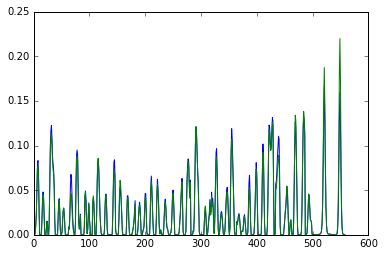

In [73]:
plt.plot(m1.eigvec[0])
plt.plot(m2.eigvec[0])

In [74]:
import run_empca
reload(run_empca)
from run_empca import *

In [75]:
resize_pix_eigvecs(falsespecs.T,m1,nstars=5)
resize_pix_eigvecs(falsespecs.T,m2,nstars=5)

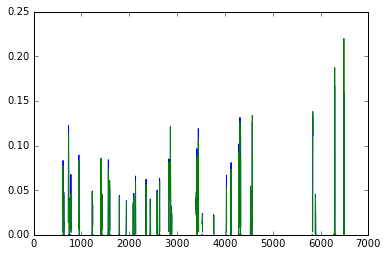

In [76]:
plt.plot(m1.eigvec[0])
plt.plot(m2.eigvec[0])